# Problema de negócio. 

- Empresa precia saber a previsão diária das vendas das proximas 6 semanas para reforma das lojas.


# 0.0 imports

In [115]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot  as plt
from datetime import datetime, timedelta

# 0.1 helper function

# 0.2 loading data 

In [6]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)

In [7]:
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

In [8]:
df_raw = pd.merge (df_sales_raw , df_store_raw, how = 'left', on='Store')

In [9]:
df_raw.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
481223,329,6,2014-04-26,4301,408,1,0,0,0,a,a,1310.0,6.0,1990.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
197044,805,4,2015-02-05,5557,503,1,1,0,0,d,a,24770.0,10.0,2011.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
381150,937,3,2014-07-30,8800,637,1,1,0,1,d,a,2810.0,NaN,NaN,1,10.0,2014.0,"Jan,Apr,Jul,Oct"
515668,209,3,2014-03-26,4542,525,1,0,0,0,a,c,11680.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
253312,122,6,2014-12-13,6579,748,1,0,0,0,a,c,58260.0,4.0,2013.0,0,NaN,NaN,NaN


# 1.0 Data description

In [11]:
# know all data and know all dimentions we are working whith to check if we have all equipment necessary. 

## 1.1 rename columns

In [13]:
df1 = df_raw.copy() #copy for safety and run this work by parts easily.

In [14]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [15]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase = lambda x: inflection.underscore(x)
cols_new = list( map( snakecase, cols_old ))

df1.columns = cols_new

In [16]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 data description

In [18]:
df1.shape

print(f'numero de linhas: {df1.shape[0]}')
print(f'numero de colunas: {df1.shape[1]}')

numero de linhas: 1017209
numero de colunas: 18


In [19]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [20]:
df1['date'] = pd.to_datetime(df1['date'])

In [21]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.3 Adjusting date columns

In [23]:
df1['date'] = pd.to_datetime(df1['date']) #adjusting column date

In [24]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 check NAN

In [26]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 fill NaN

In [28]:
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x)#é usado math para verificar os nan porque a coluna é float

df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'],axis=1)

df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'] = df1['promo_interval'].fillna(0)

df1['month_map']      = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'] else 0, axis=1 )

In [29]:
df1.isna().sum() #nan tratados

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   store                         1017209 non-null  int64         
 1   day_of_week                   1017209 non-null  int64         
 2   date                          1017209 non-null  datetime64[ns]
 3   sales                         1017209 non-null  int64         
 4   customers                     1017209 non-null  int64         
 5   open                          1017209 non-null  int64         
 6   promo                         1017209 non-null  int64         
 7   state_holiday                 1017209 non-null  object        
 8   school_holiday                1017209 non-null  int64         
 9   store_type                    1017209 non-null  object        
 10  assortment                    1017209 non-null  object        
 11

## 1.6 change types of columns

In [32]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [33]:
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

## 1.7 descriptive statistical

In [35]:
#spare caregories and numbers columns.
num_attributes = df1.select_dtypes(include = ['int64','int32', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int32','int64', 'float64','datetime64[ns]' ])

In [36]:
num_attributes.dtypes

store                             int64
day_of_week                       int64
sales                             int64
customers                         int64
open                              int64
promo                             int64
school_holiday                    int64
competition_distance            float64
competition_open_since_month      int32
competition_open_since_year       int32
promo2                            int64
promo2_since_week                 int32
promo2_since_year                 int32
is_promo                          int64
dtype: object

### 1.7.1 numerical atributes

In [38]:
# criating a dataframe with mean, median, std, min, max , range, skew and kutosis.

In [39]:
#central tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#Dispersion
d1 = pd.DataFrame(num_attributes.apply ( np.std )).T
d2 = pd.DataFrame(num_attributes.apply ( min )).T
d3 = pd.DataFrame(num_attributes.apply ( max )).T              
d4 = pd.DataFrame(num_attributes.apply ( lambda x: x.min()- x.max() )).T
d5 = pd.DataFrame(num_attributes.apply ( lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply ( lambda x: x.kurtosis())).T
                   

In [40]:
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6], axis=0).T

In [41]:
m.columns= ['min', 'max', 'range','mean', 'median', 'std', 'skew', 'kurtosis']

In [42]:
m

,min,max,range,mean,median,std,skew,kurtosis
store,1.0,1115.0,-1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
day_of_week,1.0,7.0,-6.0,3.998341,4.0,1.997390,0.001593,-1.246873
sales,0.0,41551.0,-41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
customers,0.0,7388.0,-7388.0,633.145946,609.0,464.411506,1.598650,7.091773
open,0.0,1.0,-1.0,0.830107,1.0,0.375539,-1.758045,1.090723
promo,0.0,1.0,-1.0,0.381515,0.0,0.485758,0.487838,-1.762018
school_holiday,0.0,1.0,-1.0,0.178647,0.0,0.383056,1.677842,0.815154
competition_distance,20.0,200000.0,-199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
competition_open_since_month,1.0,12.0,-11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
competition_open_since_year,1900.0,2015.0,-115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


C:\Users\thami\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


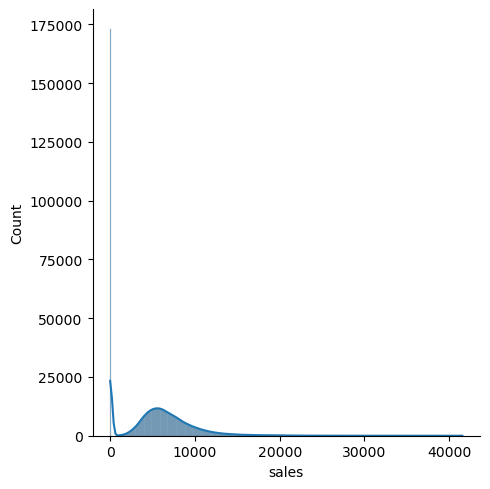

In [43]:
sns.displot(data=df1, x='sales', kde=True)

C:\Users\thami\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


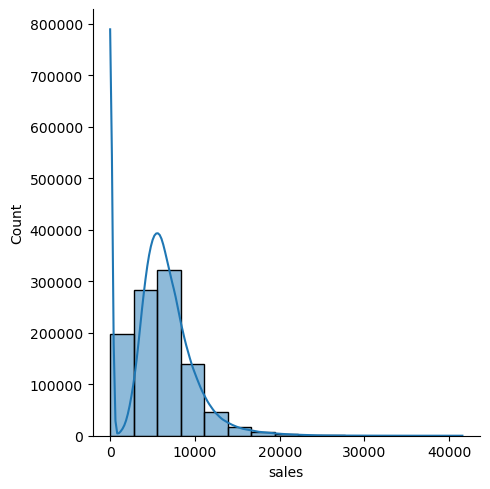

In [44]:
sns.displot(df1['sales'], bins=15, kde=True)

C:\Users\thami\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


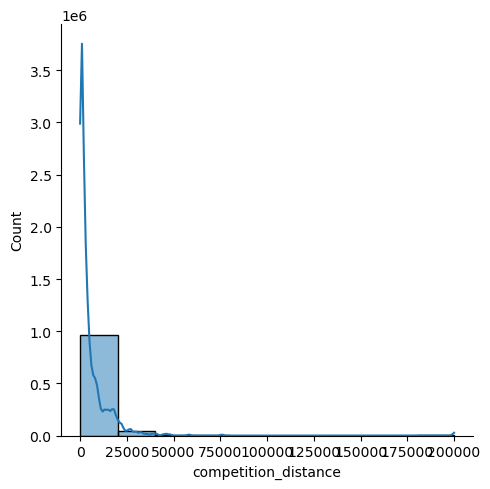

In [45]:
sns.displot(df1['competition_distance'],bins=10, kde=True) 

### 1.7.2 categorical attibrutes

In [47]:
cat_attributes.nunique()

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

In [48]:
sales_hollyday = df1.loc[df1['state_holiday'] != '0', :]

In [49]:
data_aux = sales_hollyday.loc[sales_hollyday['sales']>0 , :]

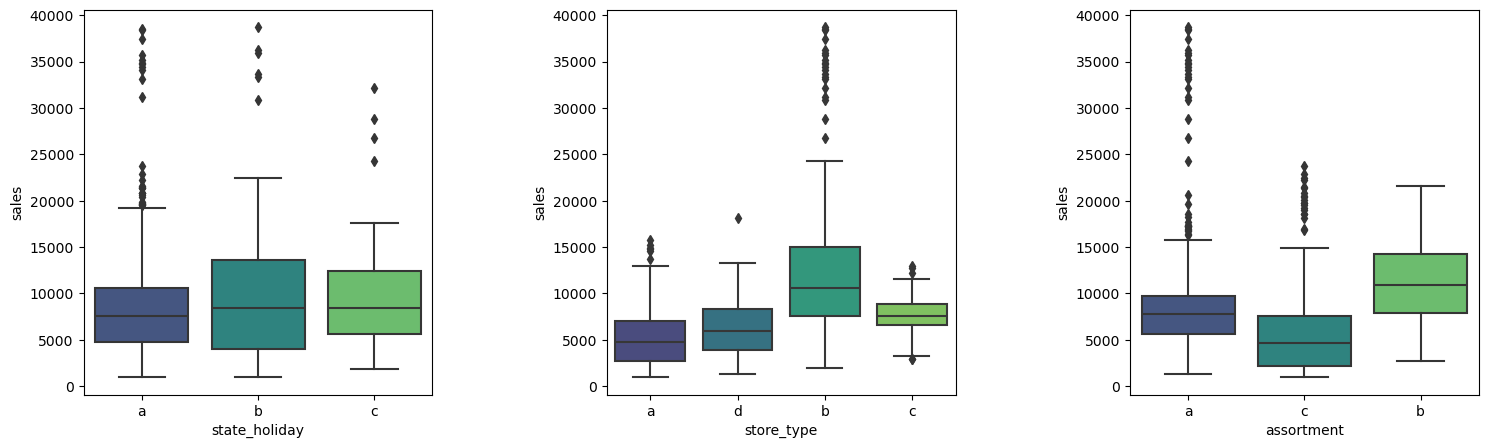

In [50]:
plt.figure(figsize=(18, 5))

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday' , y='sales', data=data_aux, palette='viridis')

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=data_aux, palette='viridis')

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y= 'sales', data=data_aux, palette='viridis')

plt.subplots_adjust(wspace=0.5)

plt.show()


# 2.0 Feature Engineering

## 2.1 Creating Hypotheses

### 2.1.1 - Mapa mentel de hipoteses

### 2.1.2 - Criação das hipoteses

### 2.1.3 - Lista final de hipoteses

## 2.2 Final Hypotheses

## 2.3 Feature Engineering

In [75]:
df2 = df1.copy() #fazendo copia do arquivo para começar a partir daqui depois das monificações e otimizar o código.

In [77]:
df2.shape

(1017209, 20)

In [ ]:
#criando variaveis derivadas

In [98]:
df2['year'] = df2['date'].dt.year # year
df2['month'] = df2['date'].dt.month # month
df2['day'] = df2['date'].dt.day # day
df2['week_of_year'] = df2['date'].dt.isocalendar().week #week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W') #year week

In [94]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


In [121]:
# competition since
df2['competition_since'] = df2.apply( lambda x: datetime(year=x['competition_open_since_year'],month=x['competition_open_since_month'],day=1 ), axis=1 )
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30).apply( lambda x: x.days ).astype( int )

In [ ]:
# promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.strptime( x + '-1', '%Y-%W-%w' ) - timedelta( days=7 ) )
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply(lambda x: x.days ).astype( int )